In [1]:
# importing all necessary libraries.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import scipy.stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
# to display all the columns of the dataframe in the notebook
#pd.pandas.set_option('display.max_columns', None)
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor

In [2]:
# setting up the working directory.
os.chdir("D:/R and PYTHON files/data set/project 3")
os.getcwd()

'D:\\R and PYTHON files\\data set\\project 3'

In [3]:
# loading the data in python environment.
A=pd.read_csv("train_cab.csv",sep=',',dtype={'fare_amount':np.float},na_values={'fare_amount':'430-'}) # A= train data.
B=pd.read_csv("test.csv",sep=',')                                                                      # B= test data.
data=[A,B]
for i in data:
    i['pickup_datetime']=pd.to_datetime(i['pickup_datetime'],errors='coerce')

In [4]:
# Exploratory Data analysis
A.shape, B.shape

((16067, 7), (9914, 6))

In [5]:
A.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2.0


In [6]:
B.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12+00:00,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20+00:00,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20+00:00,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20+00:00,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20+00:00,-73.969582,40.765519,-73.980686,40.770725,1


In [8]:
A.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [9]:
B.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [10]:
# getting the details about the data sets.
A.info(), B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16066 non-null datetime64[ns, UTC]
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


(None, None)

In [11]:
# Data cleaning.
A['passenger_count'].value_counts(),B['passenger_count'].value_counts()

(1.00       11259
 2.00        2322
 5.00        1045
 3.00         676
 4.00         329
 6.00         302
 0.00          57
 43.00          2
 53.00          2
 0.12           1
 1.30           1
 531.20         1
 345.00         1
 456.00         1
 87.00          1
 55.00          1
 58.00          1
 236.00         1
 535.00         1
 536.00         1
 537.00         1
 554.00         1
 5334.00        1
 35.00          1
 5345.00        1
 557.00         1
 354.00         1
 Name: passenger_count, dtype: int64, 1    6914
 2    1474
 5     696
 3     447
 4     206
 6     177
 Name: passenger_count, dtype: int64)

In [7]:
A['fare_amount'].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
649         66.30
           ...   
2780         0.01
10002        0.00
2486        -2.50
2039        -2.90
13032       -3.00
8             NaN
26            NaN
69            NaN
126           NaN
168           NaN
240           NaN
305           NaN
350           NaN
413           NaN
455           NaN
498           NaN
667           NaN
703           NaN
746           NaN
836           NaN
840           NaN
913           NaN
1123          NaN
1574          NaN
1628      

In [9]:
sum(A['fare_amount']>453) # considring the fare amount above 543 as outlier dropping out the observation.

2

In [12]:
sum(A['fare_amount']==0) # at the same time fare amount cannot be 0.

1

In [12]:
# fare amount cannot be less than 1,the passenger count maxiumum is 6 if considring an SUV,passengr count cannot be less than one.
sum(A['fare_amount']<1),sum(A['passenger_count']>6),sum(A['passenger_count']<1) # so filtering out those observation which satisfies the above condition.

(5, 20, 58)

In [14]:
# the filtered observation which are not wanting.
A[A['fare_amount']<1],A[A['passenger_count']>6],A[A['passenger_count']<1],A[A['fare_amount']>453]

(       fare_amount           pickup_datetime  pickup_longitude  \
 2039         -2.90 2010-03-09 23:37:10+00:00        -73.789450   
 2486         -2.50 2015-03-22 05:14:27+00:00        -74.000031   
 2780          0.01 2015-05-01 15:38:41+00:00        -73.939041   
 10002         0.00 2010-02-15 14:26:01+00:00        -73.987115   
 13032        -3.00 2013-08-30 08:57:10+00:00        -73.995062   
 
        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
 2039         40.643498         -73.788665         40.641952              1.0  
 2486         40.720631         -73.999809         40.720539              1.0  
 2780         40.713963         -73.941673         40.713997              1.0  
 10002        40.738808         -74.005911         40.713960              1.0  
 13032        40.740755         -73.995885         40.741357              4.0  ,
       fare_amount           pickup_datetime  pickup_longitude  \
 233           8.5 2011-07-24 01:14:35+00:00     

In [13]:
# Latitudes range from -90 to 90.Longitudes range from -180 to 180. Removing which does not satisfy these ranges
print('pickup_longitude above 180={}'.format(sum(A['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(A['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(A['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(A['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(A['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(A['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(A['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(A['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [14]:
# latitude and longitude cannot be comprised of ero value, so filtering up the values.
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(A[i]==0)))

pickup_longitude equal to 0=315
pickup_latitude equal to 0=315
dropoff_longitude equal to 0=314
dropoff_latitude equal to 0=312


In [4]:
# Data cleaning. # by above experiments we can say that most of the data is corrupted and we need to clean it.
A=A.drop(A[A['fare_amount']<1].index,axis=0)
A=A.drop(A[A['fare_amount']>453].index,axis=0)
A=A.drop(A[A['passenger_count']>6].index,axis=0)
A=A.drop(A[A['passenger_count']<1].index,axis=0)
A=A.drop(A[A['pickup_latitude']>90].index,axis=0)
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    A=A.drop(A[A[i]==0].index,axis=0)



In [ ]:
# after removing all the wrong data points.

In [31]:
# checking the data after cleaning.
sum(A['fare_amount']<1),sum(A['passenger_count']>6),sum(A['passenger_count']<1),sum(A['fare_amount']>453)

(0, 0, 0, 0)

In [17]:
# checcking the data after cleaning.
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(A[i]==0)))

pickup_longitude equal to 0=0
pickup_latitude equal to 0=0
dropoff_longitude equal to 0=0
dropoff_latitude equal to 0=0


In [17]:
# number of observations reduced from 16067 to 15659
A.shape   # nearly dropped 408 observations.

(15659, 7)

In [18]:
# FEATURE ENGINEERING = TRANSFORMING THE DATA READY FOR MODEL.()
# checking for missing values.
print(A.isnull().sum()),print(B.isnull().sum())

fare_amount          22
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


(None, None)

In [18]:
missing_val=pd.DataFrame(A.isnull().sum())
missing_val=missing_val.reset_index()
missing_val

,index,0
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [19]:
missing_val=missing_val.rename(columns={'index':'features',0:'missing_percentage'})
missing_val

,features,missing_percentage
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [20]:
missing_val['missing_percentage']=(missing_val['missing_percentage']/len(A))
missing_val

,features,missing_percentage
0,fare_amount,0.001405
1,pickup_datetime,0.000064
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.003512


In [21]:
missing_val=missing_val.sort_values('missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,features,missing_percentage
0,passenger_count,0.003512
1,fare_amount,0.001405
2,pickup_datetime,0.000064
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [24]:
A.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0


In [5]:
# removing the NA observations.(as they are very less in count to impute.)# nearly 77 missing values.
A = A.drop(A[A['fare_amount'].isnull()].index, axis=0)
A = A.drop(A[A['passenger_count'].isnull()].index, axis=0)

In [6]:
#removing datetime missing values rows
A = A.drop(A[A['pickup_datetime'].isnull()].index, axis=0)
print(A.shape)
print(A['pickup_datetime'].isnull().sum())

(15581, 7)
0


In [7]:
A.isnull().sum(),A.shape # now there are Zero missing values. 

(fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 dtype: int64, (15581, 7))

In [46]:
A.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000,15581.000000
mean,11.369326,-73.911157,40.689391,-73.905951,40.687321,1.650491
std,10.793005,2.665863,2.620002,2.717781,2.639145,1.265930
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992372,40.736548,-73.991368,40.736297,1.000000
50%,8.500000,-73.982049,40.753303,-73.980548,40.754217,1.000000
75%,12.500000,-73.968057,40.767803,-73.965367,40.768312,2.000000
max,453.000000,40.766125,41.366138,40.802437,41.366138,6.000000


In [49]:
B.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [50]:
A['passenger_count'].unique()

array([1. , 2. , 3. , 6. , 5. , 4. , 1.3])

In [54]:
sum(A['passenger_count']==1.3)

1

In [8]:
A=A.drop(A[A['passenger_count']==1.3].index,axis=0) # passenger count cannot be 1.3 so dropping it out.

In [9]:
# MAKING NEW FEATURES.
A['pickup_datetime'] = pd.to_datetime(A['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')  # note:- A=train, B=test.
B['pickup_datetime'] = pd.to_datetime(B['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')  # note:- A=train, B=test.

In [10]:
# seperating the Pickup_datetime column into separate field like year, month, day of the week, etc

A['year'] = A['pickup_datetime'].dt.year
A['Month'] = A['pickup_datetime'].dt.month
A['Date'] = A['pickup_datetime'].dt.day
A['Day'] = A['pickup_datetime'].dt.dayofweek
A['Hour'] = A['pickup_datetime'].dt.hour
A['Minute'] = A['pickup_datetime'].dt.minute
# lets do same for B dataset which is test dataset.         # note:- A=train, B=test.
B['year'] = B['pickup_datetime'].dt.year
B['Month'] = B['pickup_datetime'].dt.month
B['Date'] = B['pickup_datetime'].dt.day
B['Day'] = B['pickup_datetime'].dt.dayofweek
B['Hour'] = B['pickup_datetime'].dt.hour
B['Minute'] =B['pickup_datetime'].dt.minute

In [11]:
A.info(),A.shape   # note:- A=train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15580 entries, 0 to 16065
Data columns (total 13 columns):
fare_amount          15580 non-null float64
pickup_datetime      15580 non-null datetime64[ns, UTC]
pickup_longitude     15580 non-null float64
pickup_latitude      15580 non-null float64
dropoff_longitude    15580 non-null float64
dropoff_latitude     15580 non-null float64
passenger_count      15580 non-null float64
year                 15580 non-null int64
Month                15580 non-null int64
Date                 15580 non-null int64
Day                  15580 non-null int64
Hour                 15580 non-null int64
Minute               15580 non-null int64
dtypes: datetime64[ns, UTC](1), float64(6), int64(6)
memory usage: 1.7 MB


(None, (15580, 13))

In [89]:
B.info(),B.shape    # note:-  B=test.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 13 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
year                 9914 non-null int64
Month                9914 non-null int64
Date                 9914 non-null int64
Day                  9914 non-null int64
Hour                 9914 non-null int64
Minute               9914 non-null int64
distance             9914 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), int64(7)
memory usage: 1007.0 KB


(None, (9914, 13))

In [77]:
A['year'].unique(),B['year'].unique()

(array([2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64),
 array([2015, 2011, 2012, 2014, 2010, 2013, 2009], dtype=int64))

In [78]:
A['Month'].unique(),B['Month'].unique()

(array([ 6,  1,  8,  4,  3, 11,  9,  7,  2, 12,  5, 10], dtype=int64),
 array([ 1, 10, 12,  2,  3,  7,  6,  8, 11,  9,  4,  5], dtype=int64))

In [79]:
A['Date'].unique(),B['Date'].unique()

(array([15,  5, 18, 21,  9,  6, 20,  4,  2,  8, 19, 22,  7, 12, 10, 28, 11,
        24, 29, 31,  1, 14, 23, 16, 17, 27,  3, 25, 30, 26, 13],
       dtype=int64),
 array([27,  8,  1,  6, 18, 29, 15, 14, 12, 20, 22,  4, 24, 28, 21,  9, 25,
         7, 31, 10, 23, 30,  2,  5,  3, 16, 11, 26, 19, 17, 13],
       dtype=int64))

In [80]:
A['Day'].unique(),A['Day'].value_counts(),B['Day'].unique(),B['Day'].value_counts()  # note:- A=train, B=test.

(array([0, 1, 3, 5, 2, 6, 4], dtype=int64), 5    2389
 4    2310
 3    2261
 2    2240
 1    2213
 6    2101
 0    2066
 Name: Day, dtype: int64, array([1, 5, 3, 0, 6, 2, 4], dtype=int64), 1    1692
 2    1612
 5    1475
 0    1454
 4    1283
 6    1222
 3    1176
 Name: Day, dtype: int64)

In [81]:
A['Hour'].unique(),A['Hour'].value_counts(),B['Hour'].unique(),B['Hour'].value_counts()  # note:- A=train, B=test.

(array([17, 16,  0,  4,  7,  9, 20,  1, 19, 14, 13, 12, 18, 15,  6, 23,  3,
         8, 10, 11, 21,  2, 22,  5], dtype=int64), 18    968
 19    961
 20    932
 21    892
 22    880
 12    777
 14    774
 13    762
 9     761
 23    752
 17    751
 15    721
 11    721
 8     681
 10    654
 16    644
 7     625
 0     583
 1     452
 6     326
 2     322
 3     282
 4     202
 5     157
 Name: Hour, dtype: int64, array([13, 11, 21, 12, 15, 20,  3, 16,  2,  9,  0,  8, 19, 18, 14, 23, 10,
        22,  4,  7,  6,  5, 17,  1], dtype=int64), 7     830
 22    804
 21    797
 16    756
 18    752
 2     565
 12    523
 23    503
 9     464
 13    458
 17    425
 14    401
 0     379
 19    334
 20    325
 11    276
 8     267
 15    265
 1     232
 10    190
 3     145
 6      94
 5      65
 4      64
 Name: Hour, dtype: int64)

In [82]:
A['Minute'].unique(),A['Minute'].value_counts(),B['Minute'].unique(),B['Minute'].value_counts()  # note:- A=train, B=test.

(array([26, 52, 35, 30, 51, 50, 22, 11,  4, 54,  8, 36, 18, 15, 17, 29, 37,
        47,  3, 10,  5, 42, 39, 55, 38, 28, 12, 14, 53, 16,  9, 31,  1,  7,
         6, 13, 57, 21, 59, 19, 34, 20,  0, 33, 24, 44, 40,  2, 49, 48, 41,
        56, 23, 43, 27, 45, 46, 32, 58, 25], dtype=int64), 5     291
 20    287
 10    285
 43    282
 41    281
 54    278
 49    278
 39    278
 51    277
 11    276
 37    272
 13    272
 26    272
 53    272
 32    271
 27    270
 45    269
 47    269
 33    268
 23    267
 24    267
 31    267
 1     267
 28    266
 59    265
 56    265
 29    264
 22    263
 42    262
 50    261
 2     261
 46    260
 48    260
 7     259
 44    257
 6     257
 14    257
 57    257
 52    256
 38    256
 12    255
 35    254
 17    254
 21    254
 58    252
 15    251
 0     249
 16    248
 30    247
 25    245
 34    245
 18    244
 19    243
 4     242
 9     240
 55    236
 3     231
 8     221
 40    216
 36    211
 Name: Minute, dtype: int64, array([ 8, 53, 12, 10, 22

In [12]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [13]:
A['distance'] = A[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)   # note:- A=train, B=test.
B['distance'] = B[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)    # note:- A=train, B=test.

In [14]:
A['distance'].sort_values(ascending=False),B['distance'].sort_values(ascending=False) # note:- A=train, B=test.

(5864     5420.988959
 7014     4447.086698
 10710     129.950482
 14536     129.560455
 11619     127.509261
 12228     123.561157
 5663      101.094619
 1684       99.771579
 3075       97.985088
 9899       97.670590
 4487       95.852036
 9808       93.925599
 7401       92.605848
 12349      43.648755
 649        39.476975
 6308       37.812945
 4118       32.602535
 7021       29.478280
 6677       26.369072
 4567       25.735917
 8105       24.690884
 15023      24.125745
 15178      23.814940
 14099      23.696200
 12433      23.513721
 4268       23.196680
 3216       23.184092
 4299       23.168706
 12941      23.114168
 13804      23.077267
             ...     
 10212       0.000000
 15738       0.000000
 6632        0.000000
 4769        0.000000
 9956        0.000000
 5045        0.000000
 15230       0.000000
 12847       0.000000
 10192       0.000000
 7097        0.000000
 14940       0.000000
 14268       0.000000
 7777        0.000000
 1265        0.000000
 10959    

In [94]:
# distance travelled cannot be Zero , so removing those observation with ZERO distance travelled.
# at the same time how a person can travel 4000 to 5000 km in cab, thats not possible and removing it.
sum(A['distance']==0),sum(A['distance']>130)



(155, 2)

In [95]:
sum(B['distance']==0),sum(B['distance']>130)

(85, 0)

In [15]:
A=A.drop(A[A['distance']==0].index,axis=0)
A=A.drop(A[A['distance']>130].index,axis=0)

In [16]:
B=B.drop(B[B['distance']==0].index,axis=0)

In [17]:
A.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
count,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000,15423.000000
mean,11.371098,-73.910873,40.688603,-73.909891,40.689106,1.651948,2011.737535,6.274266,15.671335,3.035985,13.500746,29.670298,3.442804
std,10.674720,2.679431,2.633351,2.679541,2.633002,1.267688,1.870491,3.447739,8.684565,1.969601,6.509780,17.302189,4.597387
min,1.140000,-74.438233,-74.006893,-74.227047,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000111
25%,6.000000,-73.992380,40.736570,-73.991363,40.736307,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000,1.277973
50%,8.500000,-73.982077,40.753364,-73.980566,40.754246,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000,2.191048
75%,12.500000,-73.968154,40.767802,-73.965512,40.768314,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000,3.936280
max,453.000000,40.766125,41.366138,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,129.950482


In [18]:
B.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
count,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000
mean,-73.975177,40.750779,-73.974102,40.751487,1.670668,2011.821243,6.855123,16.192899,2.852986,13.465358,29.569641,3.465079
std,0.039231,0.031166,0.035135,0.033218,1.278280,1.804748,3.353627,8.837636,1.994563,6.874533,18.673511,3.976591
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.001486
25%,-73.992569,40.736084,-73.991275,40.735196,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,13.000000,1.320656
50%,-73.982365,40.753045,-73.980083,40.754056,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,33.000000,2.235472
75%,-73.968173,40.767043,-73.964295,40.768748,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,45.000000,4.064570
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,99.996040


In [19]:
# deleting the features.
deletingthefeatures = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','Minute']
A = A.drop(deletingthefeatures, axis = 1)
deleting_the_features = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','Minute']
B = B.drop(deleting_the_features, axis = 1)

In [20]:
A.head(), A.shape

(   fare_amount  passenger_count  year  Month  Date  Day  Hour  distance
 0          4.5              1.0  2009      6    15    0    17  1.030764
 1         16.9              1.0  2010      1     5    1    16  8.450134
 2          5.7              2.0  2011      8    18    3     0  1.389525
 3          7.7              1.0  2012      4    21    5     4  2.799270
 4          5.3              1.0  2010      3     9    1     7  1.999157,
 (15423, 8))

In [21]:
B.head(), B.shape

(   passenger_count  year  Month  Date  Day  Hour  distance
 0                1  2015      1    27    1    13  2.323259
 1                1  2015      1    27    1    13  2.425353
 2                1  2011     10     8    5    11  0.618628
 3                1  2012     12     1    5    21  1.961033
 4                1  2012     12     1    5    21  5.387301, (9829, 7))

In [23]:
# converting the data in required data type.
A['passenger_count'] = A['passenger_count'].astype('int64')
A['year'] = A['year'].astype('int64')
A['Month'] = A['Month'].astype('int64')
A['Date'] = A['Date'].astype('int64')
A['Day'] = A['Day'].astype('int64')
A['Hour'] = A['Hour'].astype('int64')

In [24]:
# converting the data in required data type.
B['passenger_count'] = B['passenger_count'].astype('int64')
B['year'] = B['year'].astype('int64')
B['Month'] = B['Month'].astype('int64')
B['Date'] = B['Date'].astype('int64')
B['Day'] = B['Day'].astype('int64')
B['Hour'] = B['Hour'].astype('int64')


In [25]:
A.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [26]:
B.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

(array([10881.,     0.,  2260.,     0.,   655.,     0.,   317.,     0.,
         1016.,   294.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

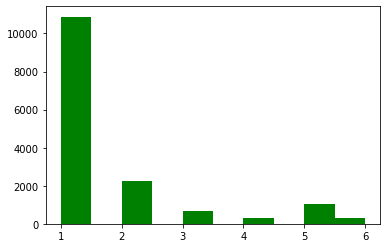

In [50]:
# DATA VISUALIZATIONS.
plt.hist(A['passenger_count'],color='green') # there are lot of single passenger travellers, followed by 2,5,3,4,6. 

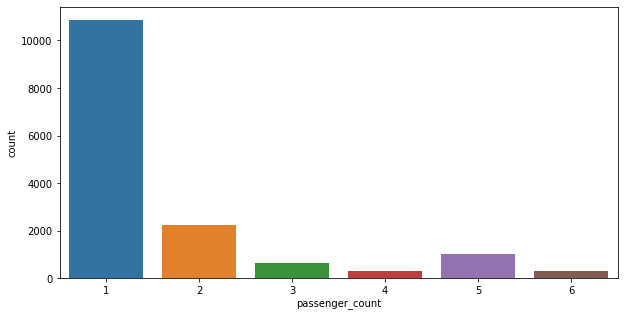

In [30]:
# Count plot on passenger count
plt.figure(figsize=(10,5))
sns.countplot(x="passenger_count", data=A)

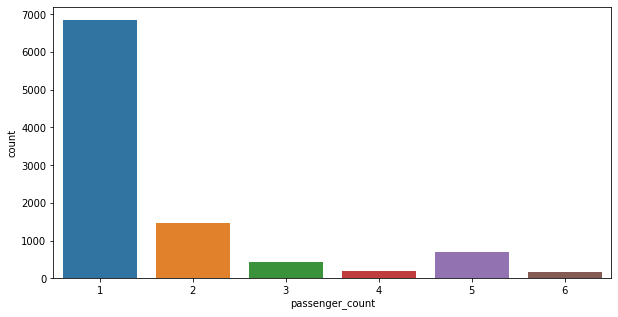

In [32]:
# Count plot on passenger count
plt.figure(figsize=(10,5))
sns.countplot(x="passenger_count", data=B)  # passenger count for test data.

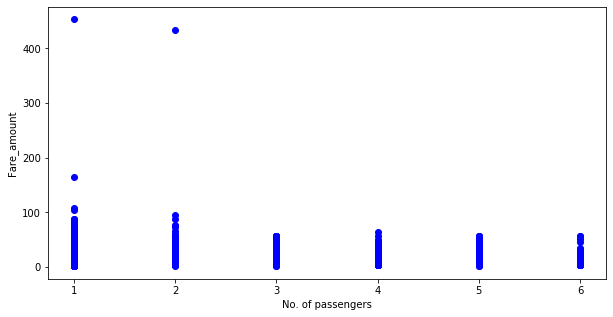

In [49]:
# relationship between passenger count and fare amount.
plt.figure(figsize=(10,5))
plt.scatter(x="passenger_count",y="fare_amount", data=A,color='blue')
plt.xlabel('No. of passengers')
plt.ylabel('Fare_amount')
plt.show()

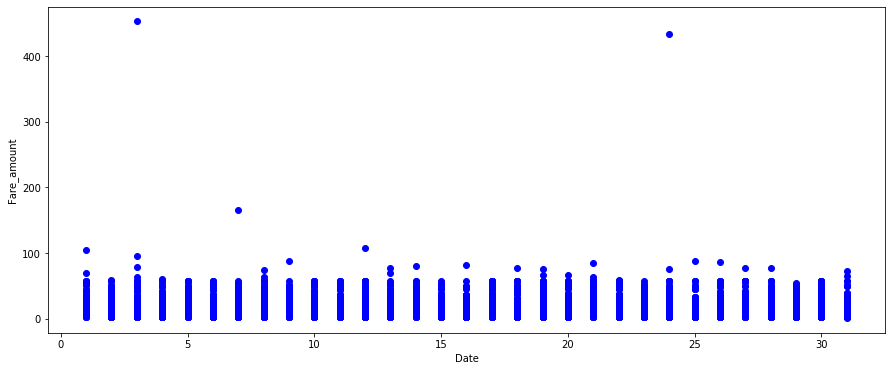

In [53]:
# relationship between date and fare amount.
plt.figure(figsize=(15,6))
plt.scatter(x="Date",y="fare_amount", data=A,color='blue')
plt.xlabel('Date')
plt.ylabel('Fare_amount')
plt.show()

(array([1341.,  479.,  481., 2047., 1360., 1520., 2117., 1703., 1871.,
        2504.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

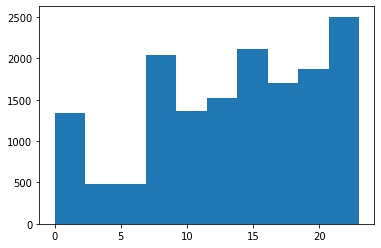

In [62]:
# number of cabs with respect to hours.  .
plt.hist(A["Hour"])

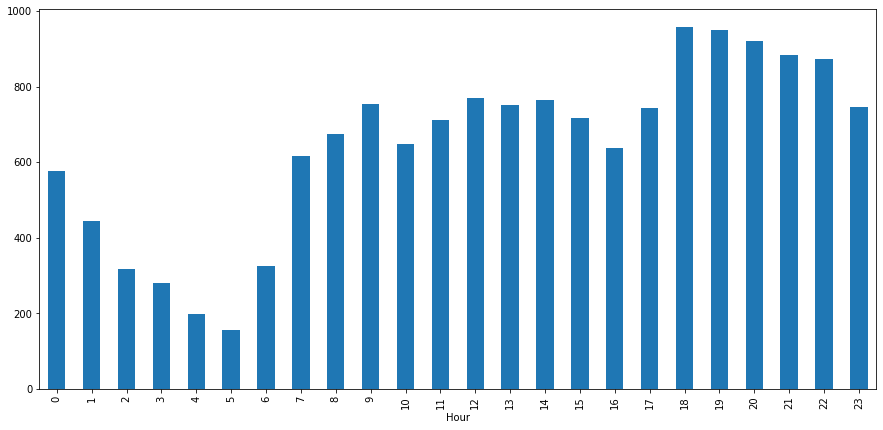

In [61]:
# number of cabs with respect to hours..
plt.figure(figsize=(15,7))
A.groupby(A["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

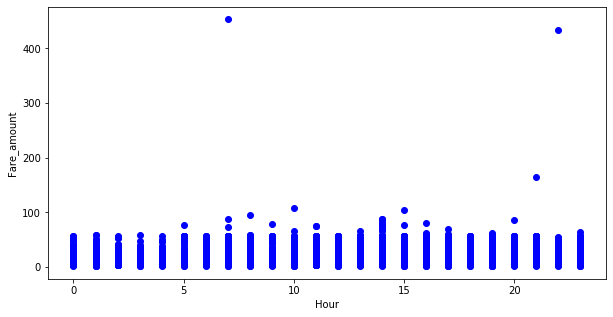

In [63]:
# realationship between fare and hour
plt.figure(figsize=(10,5))
plt.scatter(x="Hour",y="fare_amount", data=A,color='blue')
plt.xlabel('Hour')
plt.ylabel('Fare_amount')
plt.show()

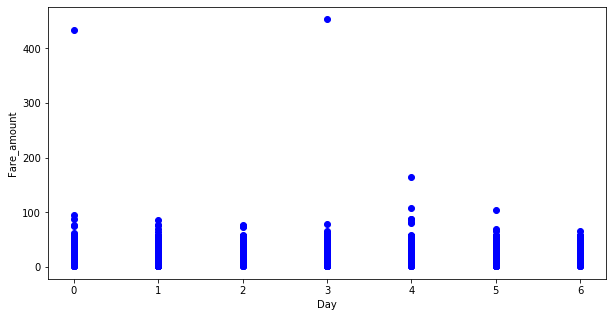

In [64]:
# realationship between fare and day
plt.figure(figsize=(10,5))
plt.scatter(x="Day",y="fare_amount", data=A,color='blue')
plt.xlabel('Day')
plt.ylabel('Fare_amount')
plt.show()

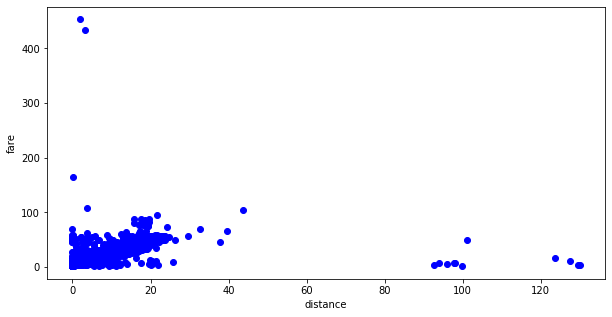

In [70]:
# realationship between fare and distance
plt.figure(figsize=(10,5))
plt.scatter(x="distance",y="fare_amount", data=A,color='blue')
plt.xlabel('distance')
plt.ylabel('fare')
plt.show()

fare_amount


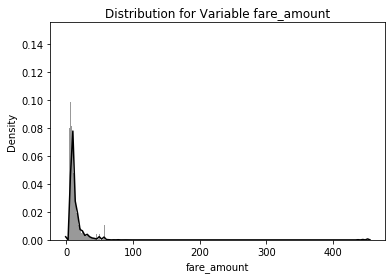

distance


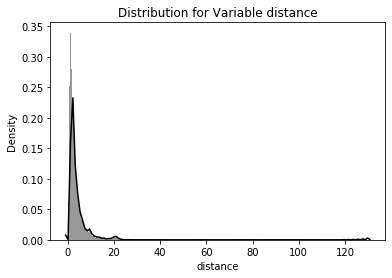

In [72]:
# checking the distribution of features...(fare_amount and Distance), rest of the features are date, time, year , hour...
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(A[i],bins='auto',color='black')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

(array([1.5113e+04, 3.0400e+02, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  1.14 ,  46.326,  91.512, 136.698, 181.884, 227.07 , 272.256,
        317.442, 362.628, 407.814, 453.   ]),
 <a list of 10 Patch objects>)

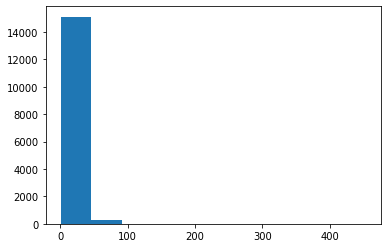

In [73]:
plt.hist(A['fare_amount'])

(array([1.4927e+04, 4.7900e+02, 4.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 7.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([1.11194926e-04, 1.29951483e+01, 2.59901854e+01, 3.89852225e+01,
        5.19802596e+01, 6.49752967e+01, 7.79703338e+01, 9.09653709e+01,
        1.03960408e+02, 1.16955445e+02, 1.29950482e+02]),
 <a list of 10 Patch objects>)

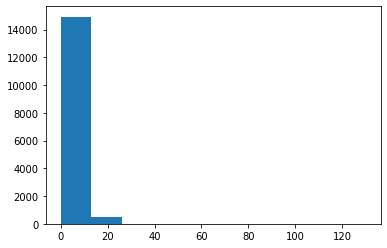

In [74]:
plt.hist(A['distance'])

In [75]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
A['fare_amount'] = np.log1p(A['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
A['distance'] = np.log1p(A['distance'])

In [76]:
A.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,1.704748,1,2009,6,15,0,17,0.708412
1,2.884801,1,2010,1,5,1,16,2.246029
2,1.902108,2,2011,8,18,3,0,0.871095
3,2.163323,1,2012,4,21,5,4,1.334809
4,1.840550,1,2010,3,9,1,7,1.098331


fare_amount


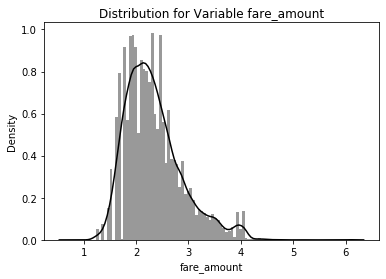

distance


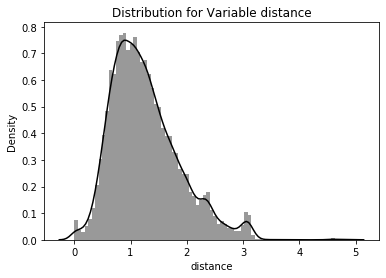

In [78]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(A[i],bins='auto',color='black')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

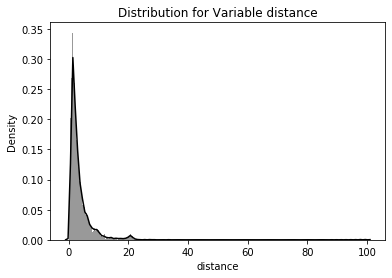

In [80]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(B['distance'],bins='auto',color='black')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [82]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
B['distance'] = np.log1p(B['distance'])

In [81]:
B.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


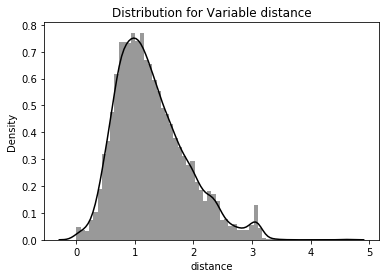

In [84]:
sns.distplot(B['distance'],bins='auto',color='black')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [85]:
numerical_val=['fare_amount','Date','distance','Hour','Day','passenger_count','year']

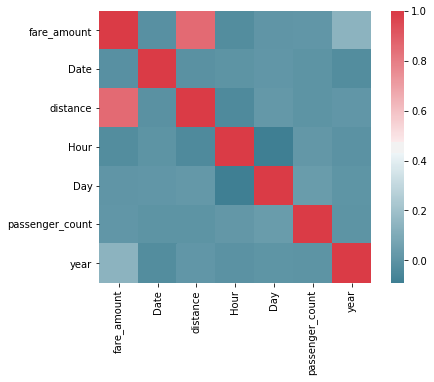

In [87]:
# FEATURE SELECTION     #### FILTER METHOD ####    ## pearson correlation plot ##
A_corr=A.loc[:,numerical_val]
f, ax = plt.subplots(figsize=(7, 5))
correlation_matrix=A_corr.corr()
#correlation plot
sns.heatmap(correlation_matrix,mask=np.zeros_like(correlation_matrix,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax).get_figure().savefig('pythonheat_map.png')

In [ ]:
# by above observation removing feature "Date" it is highly negetively correlated with other features.

In [118]:
y=A['fare_amount']
x=A.drop(["fare_amount"],axis=1)

In [122]:
# splitting the train data set for model building and finding accuracy.
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1)

In [127]:
#### FEATURE SELECTION BY EMBEDDED METHOD   ####
## LASSO REGRESSION SELECTION ## ## level 1 ##
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
sel_.fit(xtrain, ytrain)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [128]:
sel_.get_support()

array([ True,  True,  True, False,  True,  True,  True])

In [129]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = xtrain.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((xtrain.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 7
selected features: 6
features with coefficients shrank to zero: 1


In [130]:
selected_feat   ## the below features are selected by EMBEDDED METHOD...SELECTION.

Index(['passenger_count', 'year', 'Month', 'Day', 'Hour', 'distance'], dtype='object')

In [132]:
pd.Series(selected_feat).to_csv('selected_features.csv', index=False)

C:\Users\ELCOT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [133]:
features = pd.read_csv('selected_features.csv', header=None)
features = [x for x in features[0]] 

In [134]:
# reduce the train and test set to the desired features

xtrain = xtrain[features]
xtest = xtest[features]

In [143]:
# preparing the new test case data...
B=B.drop(['Date'],axis=1)

In [144]:
Btest=B

In [146]:
Btest.shape

(9829, 6)

In [147]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((13880, 6), (1543, 6), (13880,), (1543,))

In [148]:
### MODEL BUILDING ###
## LINEAR REGRESSION ##
LRmodel=sm.OLS(ytrain,xtrain).fit()

In [149]:
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.695e+05
Date:                Mon, 04 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:55:23   Log-Likelihood:                         -1936.0
No. Observations:               13880   AIC:                                      3884.
Df Residuals:                   13874   BIC:                                      3929.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
passenger_count     0.0046      0.002      2.487      0.013       0.001       0.008
year                0.0007   4.91e-06    134.848      0.000       0.001       0.001
Month               0.0039      0.001      5.761      0.000       0.003       0.005
Day                -0.0029      0.001     -2.403      0.016      -0.005      -0.001
Hour                0.0005      0.000      1.279      0.201      -0.000       0.001
distance            0.7686      0.004    198.136      0.000       0.761       0.776
==============================================================================
Omnibus:                     5376.673   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           495029.631
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                      32.198   Cond. No.                     3.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
predictionLR=LRmodel.predict(xtest)

In [152]:
predictionLR.head()

8522     1.873007
8984     2.509240
14856    2.618794
8284     2.613001
6236     2.360400
dtype: float64

In [154]:
newpredB=LRmodel.predict(Btest)

In [156]:
newpredB.head()

0    2.268725
1    2.291980
2    1.736111
3    2.213491
4    2.804340
dtype: float64

In [157]:
### LASSO REGRESSION ###
lasso_model = Lasso(alpha=0.005, random_state=0)
lasso_model.fit(xtrain, ytrain)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [161]:
predict_lasso=lasso_model.predict(xtest)

In [164]:
predict_lasso

array([1.96027809, 2.51013584, 2.6191131 , ..., 1.61404413, 2.14924523,
       1.82414348])

In [165]:
ytest.head()

8522     1.791759
8984     2.116256
14856    2.509599
8284     2.572612
6236     2.674149
Name: fare_amount, dtype: float64

In [166]:
predict_lassoB=lasso_model.predict(Btest)

In [167]:
predict_lassoB

array([2.37961157, 2.40239955, 1.73292813, ..., 3.75865788, 3.15436923,
       2.06233397])

In [187]:
### DECISION TREE REGRESSOR ###
DTR=DecisionTreeRegressor(max_depth=10).fit(xtrain,ytrain)

In [170]:
DTR

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [188]:
prediction_DTR=DTR.predict(xtest)

In [189]:
prediction_DTR

array([1.74778903, 2.46818761, 2.42954885, ..., 1.6533939 , 2.17679327,
       1.64437129])

In [190]:
prediction_DTRB=DTR.predict(Btest)

In [191]:
prediction_DTRB

array([2.44073665, 2.44073665, 1.6533939 , ..., 1.87180218, 3.0898586 ,
       1.92764985])

In [192]:
### RANDOM FOREST REGRESSOR ###
RF=RandomForestRegressor(n_estimators = 20).fit(xtrain, ytrain)

In [193]:
RFprediction=RF.predict(xtest)

In [194]:
RFprediction

array([1.90846942, 2.81408908, 2.40214035, ..., 1.66488415, 2.05072706,
       1.7467481 ])

In [195]:
RFpredictionB=RF.predict(Btest)

In [196]:
RFpredictionB

array([2.49211221, 2.65584478, 1.77625769, ..., 3.23306324, 3.24722293,
       2.14143763])

In [181]:
##### MODEL EVALUATION #####
#mape                                    #av= actual value and pv= predicted value
def mape(av, pv): 
    mape = np.mean(np.abs((av - pv) / av))*100
    return mape


In [182]:
## performance of linear regression model.
mape(ytest,predictionLR)                   ### Accuracy= 92.1 %
                                          ### error =7.9 %

7.9678426625798675

In [183]:
## performance of lasso regression model.
mape(ytest,predict_lasso)                  ### Accuracy= 92.4 %
                                           ### error= 7.6 %

7.64444180801591

In [197]:
## performance of decision tree regression model.
mape(ytest,prediction_DTR)                         ### Accuracy= 92.0 %
                                                   ### error= 8.0 %

8.022050182157194

In [198]:
## performance of random forest regression model.
mape(ytest,RFprediction)                           ### Accuracy= 92.2 %
                                                   ### error= 7.8 %

7.859844745946555

In [199]:
#### MODEL SELECTION ####
 ## ALL MODELS PERFORM WELL 
    # NOTICABALLY LASSO AND RANDOM FOREST PERFORM VERY GOOD.....

Text(0.5, 1.0, 'Feature Importance')

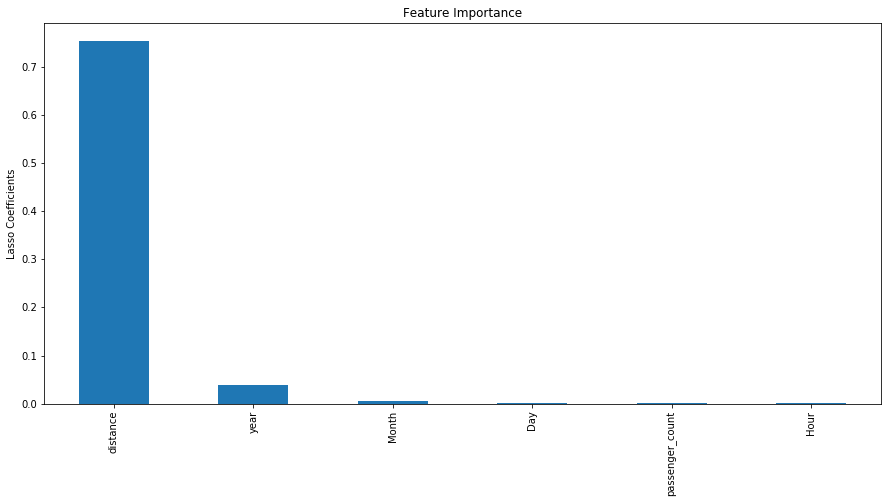

In [217]:
#  let's look at the feature importance (best model= lasso), so selecting lasso co-efficients

importance = pd.Series(np.abs(lasso_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(15,7))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')             ##### this section is further used for model deployment .

In [218]:
#### writing back best prediction (lasso regression results) results to the TEST data set (B)
B['fare_amount']=predict_lassoB

In [220]:
B.head()

,passenger_count,year,Month,Day,Hour,distance,fare_amount
0,1,2015,1,1,13,1.200946,2.379612
1,1,2015,1,1,13,1.231205,2.402400
2,1,2011,10,5,11,0.481579,1.732928
3,1,2012,12,5,21,1.085538,2.241805
4,1,2012,12,5,21,1.854312,2.820778


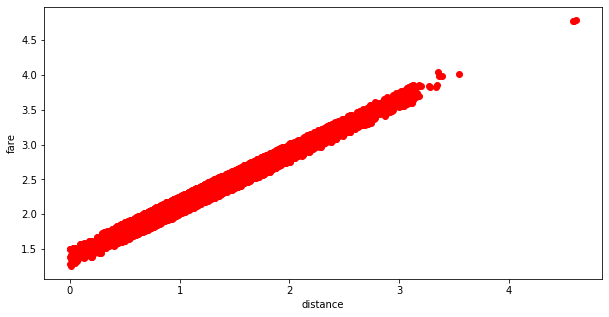

In [234]:
#### lets visualize the predicted fare amount in the test data.
# realationship between fare and distance
plt.figure(figsize=(10,5))
plt.scatter(x="distance",y="fare_amount", data=B,color='red')
plt.xlabel('distance')
plt.ylabel('fare')
plt.show()

In [ ]:
#################   END OF PROJECT   ###############